# Isolation Forest 
Isolation Forest is an algorithm used for anomaly detection. It works by isolating observations in a dataset to identify outliers. Here’s a basic overview of how it works:

1. <b>Isolation</b>: The algorithm creates multiple decision trees by randomly selecting features and splitting values to isolate observations. The idea is that anomalies, or outliers, are easier to isolate than normal observations.
2. <b>Scoring</b>: After building the trees, the algorithm calculates an "anomaly score" based on how quickly an observation is isolated. Observations that are isolated with fewer splits are considered anomalies.
3. <b>Efficiency</b>: Isolation Forest is particularly efficient for high-dimensional datasets because it doesn't require distance computations or density estimations.

It’s widely used for fraud detection, network security, and other applications where identifying outliers is important. 

## Steps of Isolation Forest
1. Build Isolation Trees:
    * Construct multiple isolation trees by randomly selecting features and split values.
    * Continue splitting the data until each observation is isolated in a leaf node.
2. Calculate Path Lengths:
    * For each data point, calculate the path length needed to isolate the point in each tree.
3. Compute Anomaly Scores:
    * Aggregate the path lengths from all trees to compute the average path length.
    * Calculate the anomaly score using the average path length. Points with shorter average path lengths have higher anomaly scores and are more likely to be anomalies.
4. Decision Making:
    * Classify data points based on the anomaly scores. Typically, a threshold is set to distinguish between normal and anomalous data points.

## Advantages
* <b>Efficiency</b>: Isolation Forest is computationally efficient, especially for high-dimensional data. It avoids complex distance computations and density estimations.
* <b>Scalability</b>: It handles large datasets well due to its simple tree-based approach.

## Contamination Parameter
When you set the contamination parameter, you're essentially informing the model about the fraction of data points you believe to be outliers. For example, if you set contamination=0.1, you expect 10% of your data to be anomalous.
Determining the Anomaly Threshold:

During the training phase, the Isolation Forest algorithm calculates an anomaly score for each data point.
Based on the contamination parameter, the algorithm determines a threshold for these scores. Data points with scores above this threshold are classified as anomalies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

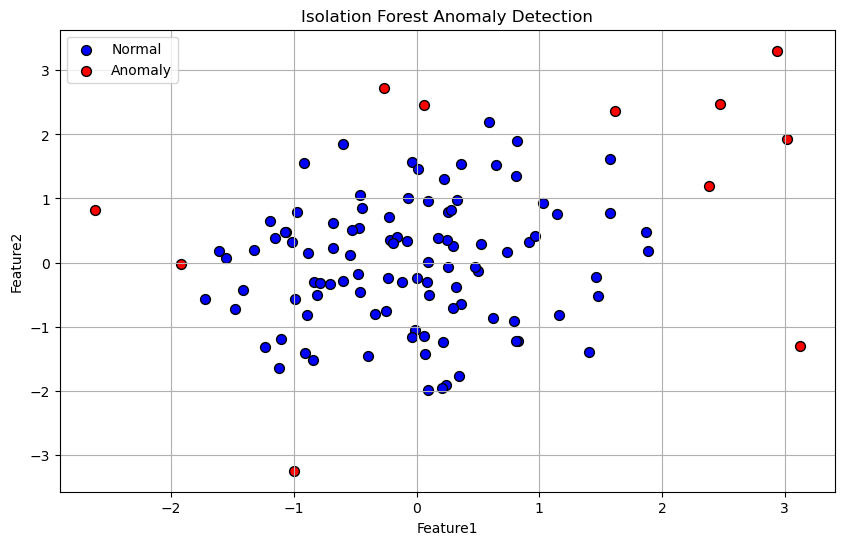

In [3]:
# Generate sample data
np.random.seed(42)
# Generate normal data
normal_data = np.random.randn(100, 2)
# Generate anomaly data
anomalies = np.random.uniform(low=-4, high=4, size=(10, 2))

# Combine the data
data = np.vstack([normal_data, anomalies])

# Create DataFrame for better visualization
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
## contamination: 0.1 <= x <= 0.5. 0.1 means 10% the data is expected to be anomalies 
# Fit the model
iso_forest.fit(data_scaled)

# Predict anomalies
predictions = iso_forest.predict(data_scaled)

# -1 indicates anomaly, 1 indicates normal
df['Anomaly'] = predictions

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot normal data points
plt.scatter(df[df['Anomaly'] == 1]['Feature1'], df[df['Anomaly'] == 1]['Feature2'], label='Normal', c='blue', edgecolor='k', s=50)

# Plot anomaly data points
plt.scatter(df[df['Anomaly'] == -1]['Feature1'], df[df['Anomaly'] == -1]['Feature2'], label='Anomaly', c='red', edgecolor='k', s=50)

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()
